In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

datasetPath = "dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")

k = 2
iterationCounter = 0
input = dataset

def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    return result

In [2]:
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()
                    , c=col, label="centroid-" + str(i + 1))
    if(converged == 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if(converged == 1):
        plt.legend()
        plt.show(block=True)

In [3]:
def KMeans(data, centroidInit):
    nCluster = len(centroidInit)  # Jumlah klaster berdasarkan jumlah centroid awal
    global iterationCounter
    iterationCounter = 0  # Inisialisasi iterasi
    centroidInit = np.array(centroidInit)  # Pastikan centroid dalam bentuk array

    while True:
        iterationCounter += 1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        
        # Menghitung jarak Euclidean untuk setiap klaster
        for i in range(nCluster):
            centroidRepeated = np.repeat(centroidInit[i, :].reshape(1, -1), data.shape[0], axis=0)
            deltaMatrix = np.subtract(data, centroidRepeated)
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            
            # Menggabungkan hasil jarak Euclidean ke matriks
            euclideanMatrixAllCluster = np.concatenate(
                (euclideanMatrixAllCluster, euclideanMatrix.reshape(-1, 1)), axis=1
            )
        
        # Menentukan klaster untuk setiap data berdasarkan jarak minimum
        clusterMatrix = np.argmin(euclideanMatrixAllCluster, axis=1)
        listClusterMember = [[] for _ in range(nCluster)]
        for i in range(data.shape[0]):
            listClusterMember[clusterMatrix[i].item()].append(data[i, :])  # Ganti np.asscalar dengan item()
        
        # Menghitung centroid baru
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(nCluster):
            memberCluster = np.array(listClusterMember[i])
            if len(memberCluster) > 0:  # Cek jika klaster memiliki anggota
                centroidCluster = memberCluster.mean(axis=0)
            else:
                centroidCluster = centroidInit[i]  # Jika kosong, gunakan centroid lama
            newCentroid = np.vstack((newCentroid, centroidCluster))
        
        print("Iterasi:", iterationCounter)
        print("Centroid:", newCentroid)
        
        # Mengecek konvergensi (jika centroid tidak berubah)
        if np.allclose(centroidInit, newCentroid):
            break
        
        centroidInit = newCentroid
        
        # Visualisasi hasil klaster (opsional)
        # plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1)  # Opsional: jeda 1 detik untuk visualisasi

    return listClusterMember, centroidInit

Iterasi: 1
Centroid: [[-4.24275  1.5032 ]
 [ 6.37972 -1.2051 ]]
Iterasi: 2
Centroid: [[-4.24275  1.5032 ]
 [ 6.37972 -1.2051 ]]


C:\Users\Fadri\AppData\Local\Temp\ipykernel_13424\2379217922.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
C:\Users\Fadri\AppData\Local\Temp\ipykernel_13424\2379217922.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()


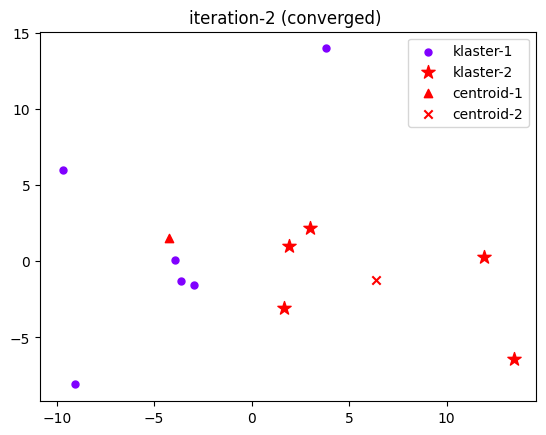

In [4]:
centroidInit = initCentroid(input, k)
clusterResults, centroid = KMeans(input, centroidInit)
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged) ", 1)